<a href="https://colab.research.google.com/github/Muhammad-UmarFarooq/Projects/blob/main/EmailCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mailbox

In [ ]:
mbox = mailbox.mbox("/content/drive/MyDrive/Store/All mail Including Spam and Trash.mbox")

In [ ]:
mbox

In [ ]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
X-Mailgun-Sid
X-Feedback-Id
Received
X-Mailgun-Sending-Ip
X-Mailgun-Batch-Id
Mime-Version
Content-Type
Subject
From
To
X-Mailgun-Tag
X-Mailgun-Track-Clicks
Message-Id
Date
Feedback-ID
sender
References
In-Reply-To
Reply-To
List-Owner
List-URL
List-Archive
List-Id
List-Post
List-Unsubscribe
List-Unsubscribe-Post
X-Mailgun-Variables


In [ ]:
import csv
with open('mailbox.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])
  for message in mbox:
   writer.writerow([
                   message['subject'],
                   message['from'],
                   message['date'],
                   message['to'],
                   message['X-Gmail-Labels'],
                   message['X-GM-THRID']
    ])


In [ ]:
df = pd.read_csv('mailbox.csv')

In [ ]:
df.head()

,subject,from,date,to,label,thread
0,Retrieval Augmented Generation,Krish Naik Academy from Krish Naik Academy Pub...,"Wed, 13 Aug 2025 08:32:09 +0000",mdumar0508@gmail.com,"Inbox,Category Updates,Unread",1840328428612990647
1,=?utf-8?B?U2V0dGxlIGRlYWxzIG9uIHRoZSBnbyDinI3v...,"""Adobe Acrobat"" <mail@mail.adobe.com>","Mon, 11 Aug 2025 22:37:12 -0700",<mdumar0508@gmail.com>,"Inbox,Category Promotions,Unread",1840226800160168723
2,Sustainable Energy Technology - Week 7 content...,onlinecourses@nptel.iitm.ac.in,"Fri, 29 Aug 2025 12:19:25 +0000 (UTC)",noc25-me178-announce@nptel.iitm.ac.in,"Inbox,Category Updates,Unread",1841792262499667908
3,"Hello, Umar. Are you there?","""Simplilearn"" <updates@simplilearnmailer.com>","Sat, 09 Aug 2025 13:04:17 +0000",mdumar0508@gmail.com,"Inbox,Category Promotions,Unread",1839983135087280456
4,=?UTF-8?Q?Don=E2=80=99t_miss_conversations_in_...,LinkedIn <groups-noreply@linkedin.com>,"Wed, 20 Aug 2025 11:43:52 +0000 (UTC)",Umar FarooQ Md <mdumar0508@gmail.com>,"Inbox,Category Social,Unread",1840974643725414494


In [ ]:
df['subject'].isnull().sum()

np.int64(1)

In [ ]:
df['subject'] = df['subject'].fillna('no subject')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  1038 non-null   object
 1   from     1038 non-null   object
 2   date     1038 non-null   object
 3   to       1038 non-null   object
 4   label    1038 non-null   object
 5   thread   1038 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 48.8+ KB


In [ ]:

df.drop(columns='to', inplace=True)

In [ ]:
df.head()

,subject,from,date,label,thread
0,Retrieval Augmented Generation,Krish Naik Academy from Krish Naik Academy Pub...,"Wed, 13 Aug 2025 08:32:09 +0000","Inbox,Category Updates,Unread",1840328428612990647
1,=?utf-8?B?U2V0dGxlIGRlYWxzIG9uIHRoZSBnbyDinI3v...,"""Adobe Acrobat"" <mail@mail.adobe.com>","Mon, 11 Aug 2025 22:37:12 -0700","Inbox,Category Promotions,Unread",1840226800160168723
2,Sustainable Energy Technology - Week 7 content...,onlinecourses@nptel.iitm.ac.in,"Fri, 29 Aug 2025 12:19:25 +0000 (UTC)","Inbox,Category Updates,Unread",1841792262499667908
3,"Hello, Umar. Are you there?","""Simplilearn"" <updates@simplilearnmailer.com>","Sat, 09 Aug 2025 13:04:17 +0000","Inbox,Category Promotions,Unread",1839983135087280456
4,=?UTF-8?Q?Don=E2=80=99t_miss_conversations_in_...,LinkedIn <groups-noreply@linkedin.com>,"Wed, 20 Aug 2025 11:43:52 +0000 (UTC)","Inbox,Category Social,Unread",1840974643725414494


In [ ]:

print(df['date'].dtype)
df['date'] = df['date'].str.rstrip(' (UTC)')
df['date'] = pd.to_datetime(df['date'], errors='coerce',utc=True)
print(df['date'].dtype)

df['dayofweek'] = df["date"].apply(lambda x: x.day_name())

print(df.head(5))


object
datetime64[ns, UTC]
                                             subject  \
0                     Retrieval Augmented Generation   
1  =?utf-8?B?U2V0dGxlIGRlYWxzIG9uIHRoZSBnbyDinI3v...   
2  Sustainable Energy Technology - Week 7 content...   
3                        Hello, Umar. Are you there?   
4  =?UTF-8?Q?Don=E2=80=99t_miss_conversations_in_...   

                                                from  \
0  Krish Naik Academy from Krish Naik Academy Pub...   
1              "Adobe Acrobat" <mail@mail.adobe.com>   
2                     onlinecourses@nptel.iitm.ac.in   
3      "Simplilearn" <updates@simplilearnmailer.com>   
4             LinkedIn <groups-noreply@linkedin.com>   

                       date                             label  \
0 2025-08-13 08:32:09+00:00     Inbox,Category Updates,Unread   
1 2025-08-12 05:37:12+00:00  Inbox,Category Promotions,Unread   
2 2025-08-29 12:19:25+00:00     Inbox,Category Updates,Unread   
3 2025-08-09 13:04:17+00:00  Inbox,Cate

In [ ]:
print(df['date'].isna().sum())

197


In [ ]:
df.count()

,0
subject,1038
from,1038
date,841
label,1038
thread,1038
dayofweek,841


In [ ]:
df['dayofweek'] = pd.Categorical(
                                 df['dayofweek'],
                                 categories=['Monday', 'Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'],
                                 ordered=True
                                 )

In [ ]:
df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [ ]:
df.head(3)

,subject,from,date,label,thread,dayofweek,timeofday
0,Retrieval Augmented Generation,Krish Naik Academy from Krish Naik Academy Pub...,2025-08-13 08:32:09+00:00,"Inbox,Category Updates,Unread",1840328428612990647,Wednesday,8.535833
1,=?utf-8?B?U2V0dGxlIGRlYWxzIG9uIHRoZSBnbyDinI3v...,"""Adobe Acrobat"" <mail@mail.adobe.com>",2025-08-12 05:37:12+00:00,"Inbox,Category Promotions,Unread",1840226800160168723,Tuesday,5.620000
2,Sustainable Energy Technology - Week 7 content...,onlinecourses@nptel.iitm.ac.in,2025-08-29 12:19:25+00:00,"Inbox,Category Updates,Unread",1841792262499667908,Friday,12.323611


In [ ]:
df['hour'] = df['date'].apply(lambda x: x.hour)
df['year_int'] = df['date'].apply(lambda x: x.year)
df['year'] = df['date'].apply(lambda x: x.year + x.dayofyear/365.25)


In [ ]:
df.set_index(df["date"], inplace=True)

In [ ]:
df.head(3)

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,
2025-08-13 08:32:09+00:00,Retrieval Augmented Generation,Krish Naik Academy from Krish Naik Academy Pub...,2025-08-13 08:32:09+00:00,"Inbox,Category Updates,Unread",1840328428612990647,Wednesday,8.535833,8.0,2025.0,2025.616016
2025-08-12 05:37:12+00:00,=?utf-8?B?U2V0dGxlIGRlYWxzIG9uIHRoZSBnbyDinI3v...,"""Adobe Acrobat"" <mail@mail.adobe.com>",2025-08-12 05:37:12+00:00,"Inbox,Category Promotions,Unread",1840226800160168723,Tuesday,5.620000,5.0,2025.0,2025.613279
2025-08-29 12:19:25+00:00,Sustainable Energy Technology - Week 7 content...,onlinecourses@nptel.iitm.ac.in,2025-08-29 12:19:25+00:00,"Inbox,Category Updates,Unread",1841792262499667908,Friday,12.323611,12.0,2025.0,2025.659822


In [ ]:
print(df.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(df.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(df['label'].value_counts())

Fri, 05 Jul 2024 02:26 PM
Mon, 01 Sep 2025 10:11 AM
label
Inbox,Category Updates,Unread                       406
Inbox,Category Social,Unread                        214
Inbox,Category Promotions,Unread                    213
Inbox,Category Personal,Unread                       80
Inbox,Important,Opened,Category Updates              29
Inbox,Important,Category Updates,Unread              22
Inbox,Opened,Category Updates                        22
Inbox,Important,Opened,Category Personal             14
Inbox,Important,Category Personal,Unread             12
Inbox,Opened,Category Personal                        6
Archived,Sent,Opened                                  4
Inbox,Opened,Category Forums                          3
Category Purchases,Inbox,Category Updates,Unread      2
Sent                                                  2
Inbox,Category Forums,Unread                          2
Sent,Opened                                           1
Spam,Category Updates,Unread                  

In [ ]:
counts = df['dayofweek'].value_counts(sort=False)
print(counts)

dayofweek
Monday       166
Tuesday      132
Wednesday    163
Thursday      99
Friday       147
Saturday      74
Sunday        60
Name: count, dtype: int64


# **Which days you get the most emails**

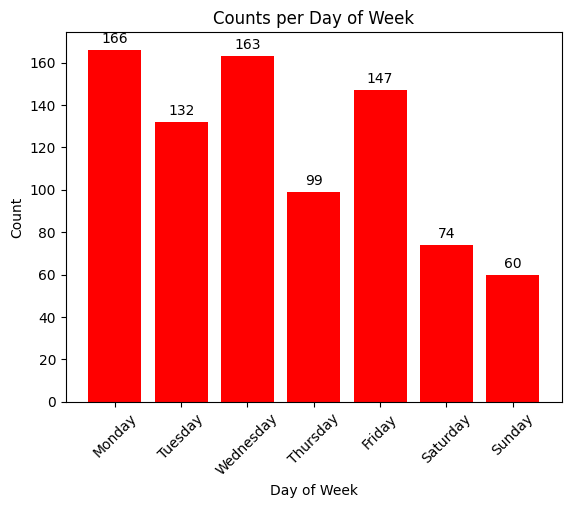

In [ ]:
bar_chart = plt.bar(counts.index, counts, color="red")
plt.bar_label(bar_chart, fmt="%d", padding=3, label_type="edge")
plt.title("Counts per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Sent vs Received emails per weekday in one grouped bar chart

In [ ]:
# sent = df[df['label']=='Sent']
# received = df[df['label']=='Inbox']


sent = df[df['label'].str.contains("Sent", case=False, na=False)]
received = df[df['label'].str.contains("Inbox", case=False, na=False)]


In [ ]:
sent.head(5)

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,
2025-07-22 14:50:38+00:00,Re: pdf,Umar FarooQ Md <mdumar0508@gmail.com>,2025-07-22 14:50:38+00:00,Sent,1838265360658658347,Tuesday,14.843889,14.0,2025.0,2025.555784
2025-07-21 14:01:17+00:00,pdf,Umar FarooQ Md <mdumar0508@gmail.com>,2025-07-21 14:01:17+00:00,"Archived,Sent,Opened",1838265360658658347,Monday,14.021389,14.0,2025.0,2025.553046
2025-07-21 13:59:11+00:00,Re: Only write week reports and week log,Umar FarooQ Md <mdumar0508@gmail.com>,2025-07-21 13:59:11+00:00,"Sent,Opened",1838232993558101566,Monday,13.986389,13.0,2025.0,2025.553046
2025-07-21 05:27:17+00:00,Only write week reports and week log,Umar FarooQ Md <mdumar0508@gmail.com>,2025-07-21 05:27:17+00:00,"Archived,Sent,Opened",1838232993558101566,Monday,5.454722,5.0,2025.0,2025.553046
2025-07-21 13:59:49+00:00,Re: i will send,Umar FarooQ Md <mdumar0508@gmail.com>,2025-07-21 13:59:49+00:00,Sent,1838232925569315948,Monday,13.996944,13.0,2025.0,2025.553046


In [ ]:
received.head(5)

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,
2025-08-13 08:32:09+00:00,Retrieval Augmented Generation,Krish Naik Academy from Krish Naik Academy Pub...,2025-08-13 08:32:09+00:00,"Inbox,Category Updates,Unread",1840328428612990647,Wednesday,8.535833,8.0,2025.0,2025.616016
2025-08-12 05:37:12+00:00,=?utf-8?B?U2V0dGxlIGRlYWxzIG9uIHRoZSBnbyDinI3v...,"""Adobe Acrobat"" <mail@mail.adobe.com>",2025-08-12 05:37:12+00:00,"Inbox,Category Promotions,Unread",1840226800160168723,Tuesday,5.620000,5.0,2025.0,2025.613279
2025-08-29 12:19:25+00:00,Sustainable Energy Technology - Week 7 content...,onlinecourses@nptel.iitm.ac.in,2025-08-29 12:19:25+00:00,"Inbox,Category Updates,Unread",1841792262499667908,Friday,12.323611,12.0,2025.0,2025.659822
2025-08-09 13:04:17+00:00,"Hello, Umar. Are you there?","""Simplilearn"" <updates@simplilearnmailer.com>",2025-08-09 13:04:17+00:00,"Inbox,Category Promotions,Unread",1839983135087280456,Saturday,13.071389,13.0,2025.0,2025.605065
2025-08-20 11:43:52+00:00,=?UTF-8?Q?Don=E2=80=99t_miss_conversations_in_...,LinkedIn <groups-noreply@linkedin.com>,2025-08-20 11:43:52+00:00,"Inbox,Category Social,Unread",1840974643725414494,Wednesday,11.731111,11.0,2025.0,2025.635181


In [ ]:
df_tmp = pd.DataFrame({
    "sent": sent['dayofweek'].value_counts(sort=False),
    "received": received['dayofweek'].value_counts(sort=False)
})


Text(0, 0.5, 'number of emails')

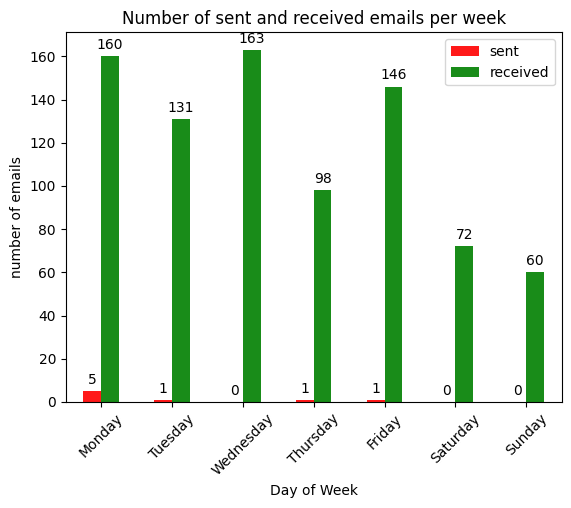

In [ ]:
side_bar_chart = df_tmp.plot(kind="bar", alpha=0.9, color=["red", "green"])
plt.xticks(rotation=45)
plt.bar_label(side_bar_chart.containers[0], fmt="%d", padding=3, label_type="edge")
plt.bar_label(side_bar_chart.containers[1], fmt="%d", padding=3, label_type="edge")
plt.title("Number of sent and received emails per week")
plt.xlabel("Day of Week")
plt.ylabel("number of emails")


In [ ]:
print(received.columns)


Index(['subject', 'from', 'date', 'label', 'thread', 'dayofweek', 'timeofday',
       'hour', 'year_int', 'year'],
      dtype='object')


In [ ]:
# Seaborn doesn’t care about duplicate values in x — it will happily plot multiple points with the same date.
# But the error you saw earlier (cannot reindex on an axis with duplicate labels) happens only if date was used as the DataFrame(sent,received) index, because indices are supposed to be unique for some operations.
# thats why sent received dataframes index are reset
sent = sent.reset_index(drop=True)
received = received.reset_index(drop=True)

print(received.index)
print(sent.index)
print(df.columns.duplicated())
print(df["year"].value_counts())
print(df["year"].duplicated().any())
print(df["year"].duplicated().sum())
print(df.index)


RangeIndex(start=0, stop=1026, step=1)
RangeIndex(start=0, stop=8, step=1)
[False False False False False False False False False False]
year
2025.629706    13
2025.621492    12
2024.714579    11
2025.438056    11
2025.591376    11
               ..
2025.260096     1
2024.706366     1
2024.952772     1
2025.528405     1
2024.925394     1
Name: count, Length: 269, dtype: int64
True
768
DatetimeIndex(['2025-08-13 08:32:09+00:00', '2025-08-12 05:37:12+00:00',
               '2025-08-29 12:19:25+00:00', '2025-08-09 13:04:17+00:00',
               '2025-08-20 11:43:52+00:00', '2025-07-22 14:22:07+00:00',
               '2025-07-09 14:24:04+00:00', '2025-07-11 14:21:58+00:00',
               '2025-05-29 20:15:55+00:00', '2025-08-06 14:13:16+00:00',
               ...
               '2024-12-03 14:09:10+00:00', '2025-03-12 19:07:20+00:00',
               '2025-06-23 14:11:44+00:00', '2024-09-30 06:07:10+00:00',
               '2025-08-19 05:02:50+00:00', '2025-08-19 04:58:03+00:00',
         

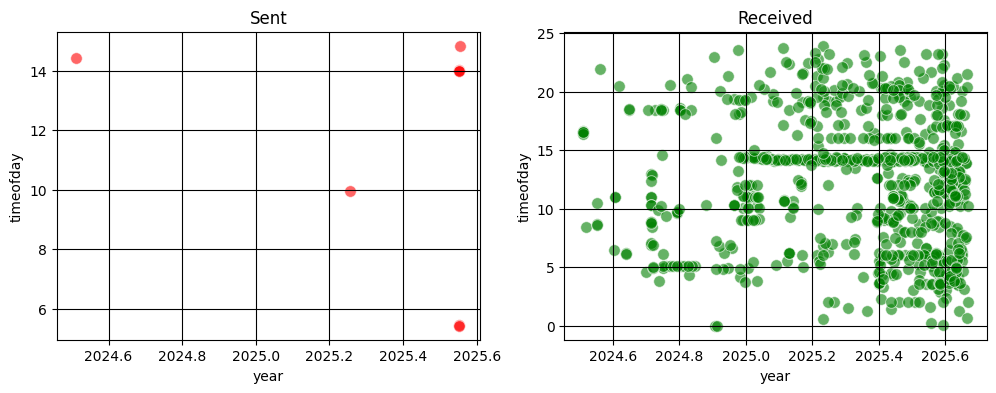

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# First subplot
sns.scatterplot(data=sent, x="year",  y="timeofday", s=70, color="red", alpha=0.6, ax=ax[0])
# sns.scatterplot(data=sent.reset_index(drop=True), x="year_int", y="timeofday", ax=ax[0])

ax[0].set_title("Sent")
ax[0].grid(ls = "-", color = "black")

# Second subplot
sns.scatterplot(data=received, x="year", y="timeofday", s=70, color="green", alpha=0.6, ax=ax[1])
# sns.scatterplot(data=received.reset_index(drop=True), x="year_int", y="timeofday", ax=ax[1])

ax[1].set_title("Received")
ax[1].grid(ls="-", color="black")

plt.show()



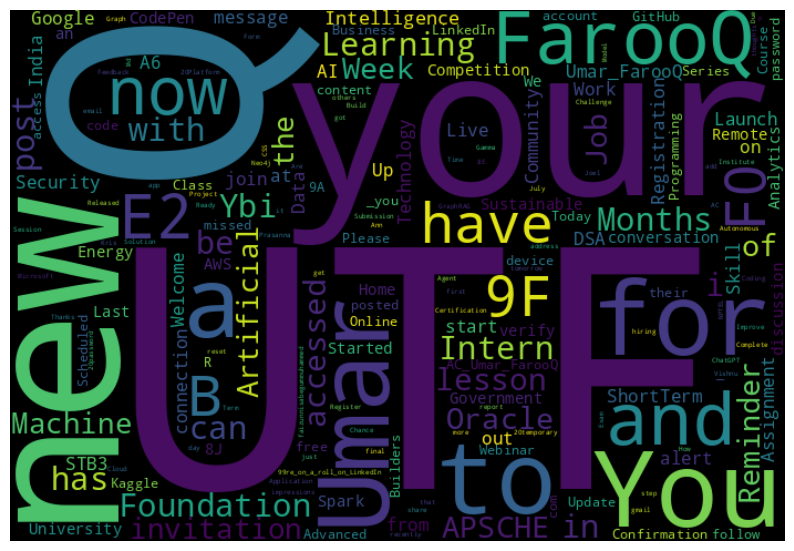

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# take only "received" subjects and join them
text = " ".join(received['subject'].dropna().astype(str))
# define stopwords
stopwords = {"Re", "Fwd", "3A_"}
# generate word cloud
wordcloud = WordCloud(width=700, height=480, stopwords=stopwords,
                      collocations=False).generate(text)

# plot
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
